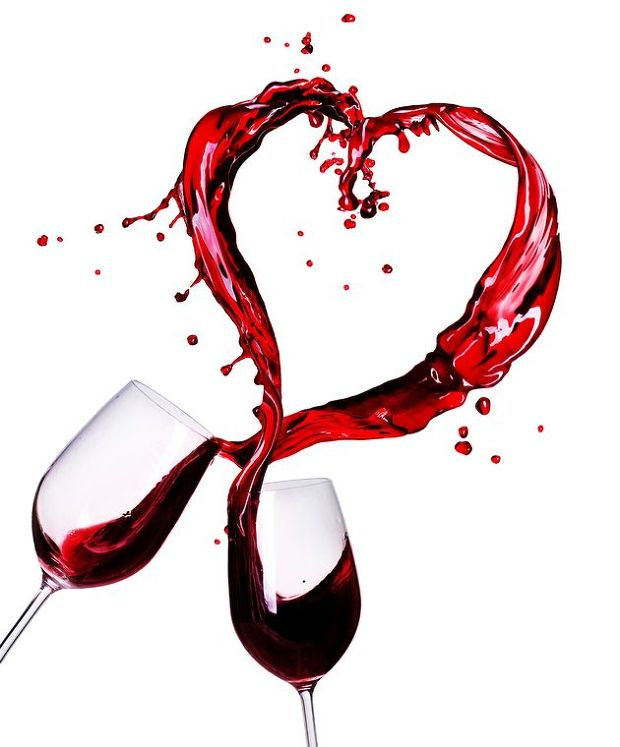

★ 학습목표와 분석 포인트 ★  
-. 우리는 이번주 지속적으로 많은 데이터를 학습하는 것  
 -. 매일 배운 내용을 과제에 적용하는 것을 코드스테이츠에서는 원하고 있다.   

 -. 이러한 학습 취지에 맞추어 오늘은 와인데이터로 학습을 진행해보고자 한다.   
 -. 오늘 배운 XGBoost는 데이터에 영향을 받는 모델이 아니기에 편하게 데이터를 골랐다.   
 -. 또한 회귀를 고름으로 비용함수에 대한 고민을 최소한으로 하고 실제 코드를 작성하고 실행해보는 것에 포인트를 두었다.   

★ 오늘의 히스토리 ★  
  
ds.ltd에는 분석 문의가 끊이지 않았다. 오늘은 와인에 대한 분석이 접수되었다.  
  
문의하신 분은 포도원에서 와인을 만드시는 농부셨다.  
  
선생님께서는 와인을 숙성하는데 과거의 누적된 학습방법을 통해서만 와인을 제조하신다.   

그러나, 최근 빅데이터가 이슈가 되면서 무엇이 와인의 품질에 가장 큰 영향을 주는지에 대해서 알고 싶다고 하셨다.  
  
이에, 와인에 대해 조사를 진행한 결과 습도, 온도, 해당 연도의 강수량, 건조함, 숙성기간, 포도종류, 지역명이 매우 중요하다는 것을 알게되었다.  

---

그런데 막상 데이터를 받으니 와인 라벨에 기재해야하는 성분표 위주로 데이터가 보관되고 있는 것을 확인하였다.  
날짜라도 있었다면, 기상청 데이터와 함께 분석하면 더 좋은 모델이 만들어질 수 있을거라는 생각이 들었다. 
  
일단 화학성분이 많이 있기 때문에 추가적인 서칭을 통해서 무엇이 어떤 성분들이  
와인에게 좋은 영향을 주는지 파악하고자 한다. 현재 있는 데이터로 최대한 분석을 이끌어내보자! 

# Feature Importances

## 1. 지속적으로 포트폴리오 프로젝트를 수행하세요
 * 지속적으로 데이터를 랭글링 하고 추가적인 시각화 결과를 만드세요
 * 작성한 코드마다 적절한 코멘트를 추가하세요
 * 모델을 학습시키고 베이스라인 모델과 비교해 보세요

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 노트북 안에 그래프를 그리기 위해 
%matplotlib inline

# 그래프 스타일 지정 
plt.style.use("ggplot")

# 그래프에서 마이너스 폰트 깨지는 문제를 방지하기 위한 코드 
plt.rc("axes", unicode_minus=False)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
wine_df = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\3day\winequality-red.csv", encoding="utf-8")

In [3]:
wine_df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [4]:
wine_df.shape

(1599, 12)

In [5]:
# 쉽게 코드를 작성하기 위해서 변수명 변경 
df = wine_df

1-1) 타켓의 분포 확인

In [6]:
df["quality"].value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

<AxesSubplot:ylabel='quality'>

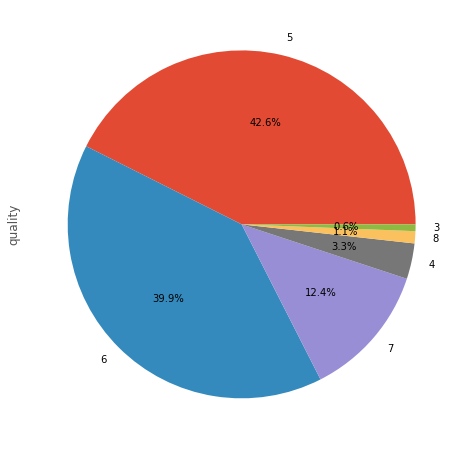

In [7]:
# 타겟에 대한 시각화 
plt.figure(1, figsize=(8,8))
df["quality"].value_counts().plot.pie(autopct="%1.1f%%")

1-2) 타켓에 대한 분포 확인 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


* describe 확인 내용  
free sulfur dioxide, total sulfur dioxide의  
 -. 분산이 큰 것으로 확인이 된다   
 -. max 값을 보았을 때 이상치가 있는게 아닌지 조심스럽게 추측해 본다  
 -. residual sugar도 이상치는 확인이 된다. 
 

 * 이제 그래프를 통해서 한번 확인해보자

🔥어제 subplot을 통해 한번에 그래프를 그리고 싶었는데 시간이 늦어서 그리지 못하였다. 오늘은 성공!

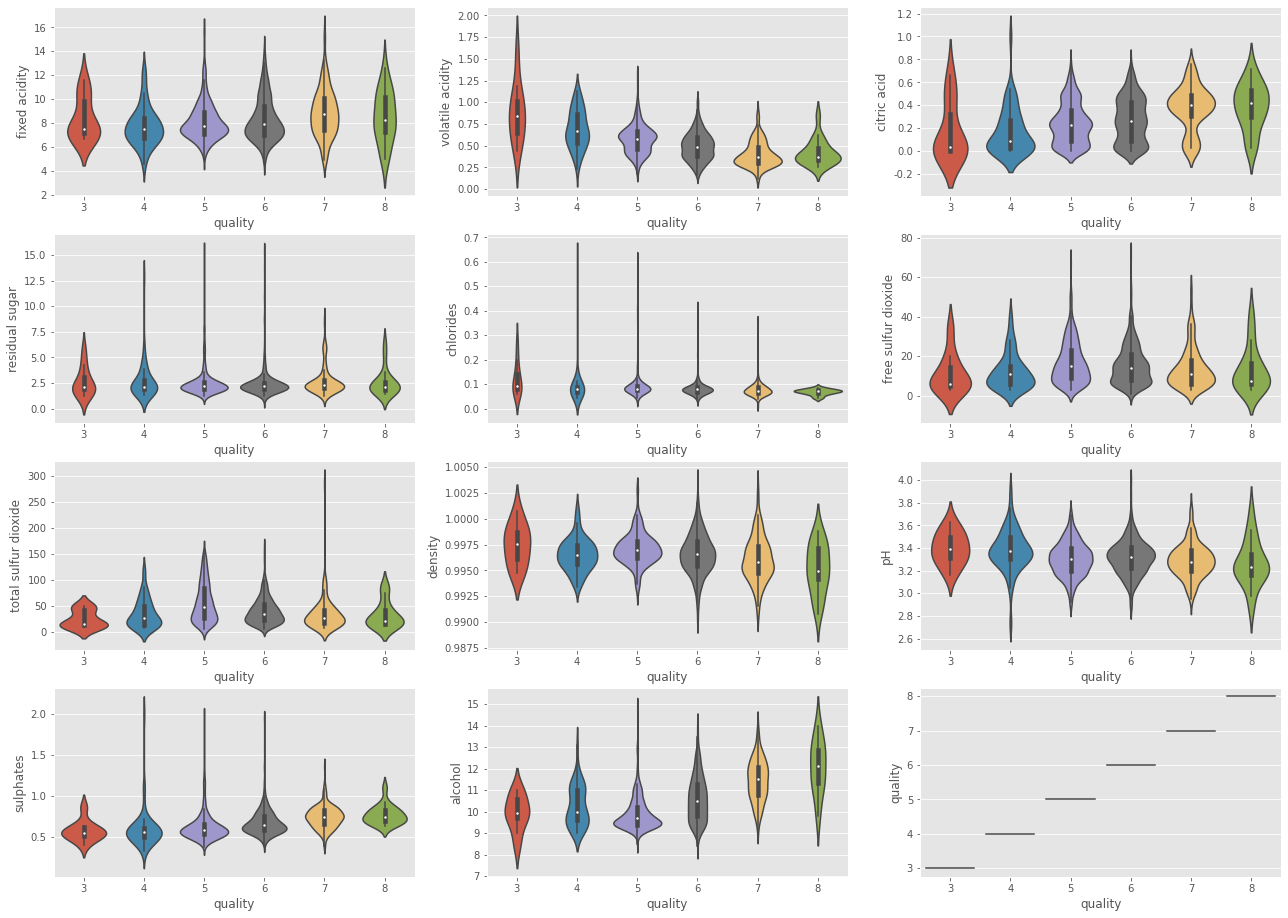

In [9]:
# subplot을 통한 데이터 시각화 및 이상치 확인 
column_names=df.columns.values
numberofcolumn=len(column_names)

counter=0
fig, axarr=plt.subplots(4,3, figsize=(22,16))
for i in range(4):
        for j in range(3):
            sns.violinplot(x='quality', y=column_names[counter],data=df, ax=axarr[i][j])
            
            counter+=1
            if counter==(numberofcolumn-1,):
                break

In [10]:
# 이상치 제거을 위한 컬럼명 리스트화 
lists = column_names.tolist()
lists

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [11]:
# 이상치 제거 전 shape
print(df.shape)

# 이상치 제거 

for list in lists :   
    condition = (df[list] >= np.percentile(df[list], 0.5)) & (df[list] <= np.percentile(df[list], 99.5))
    df[condition]

print(df.shape)

(1599, 12)
(1599, 12)


* 이상치 제거결과 확인   
  -. 이상치를 제거하려고 위와 같이 코드를 작성하였으나, 모든 데이터는 0.5 < df <99.5 안에 있는 것으로 확인하였다. 

1-3) 결측치 확인

In [12]:
df.isnull().sum() #확인결과 결측치는 없는 것으로 확인되었다. 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

1-4) 중복데이터 확인

In [13]:
df.duplicated().value_counts()

False    1359
True      240
dtype: int64

 * 일부 중복데이터가 있는 것으로 확인되었다. 
 * 그러나, 해당 데이터는 특정한 id나 이름이 있는 것이 아니기 때문에 그대로 두고 실험을 진행하고자 한다. 

In [14]:
df.select_dtypes(['int64','float64']).corr()[['quality']].T

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality,0.124052,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.1851,-0.174919,-0.057731,0.251397,0.476166,1.0


* 타겟과의 상관관계 분석   
  -. 타켓과의 상관관계가 너무 없어서 놀랐다.   
  -. 가장 높은 것이 알코올로 나왔는데 와인을 마시고 평가를 진행한것일까? 라는 질문을 하게 되었다.   
  -. 일단 각각의 컬럼이 무엇을 의미하는지 확인할 필요가 있고, 데이터가 적은 상황이니 drop하는 건 최소화하고자 한다.   
  -. 데이터가 적기 때문에 cv 등을 이용할 필요가 있다는 생각이 들었다.  

---

★ 각 feature 분석 ★

* 고정산도(fixed acidity)  
 -. 포도가 익어갈수록 당도는 높아지고 산도는 낮아진다.   
 -. 휘발산을 제외한 산도를 의미함    
 -. PH가 2이하가 되면 초산균이 번식하여 식초가 될수있음https://blog.daum.net/lchx275/209  
 -. 데이터를 직접확인해보아도 2.8~2.9pH는 있으나, 2이하인 와인 없었다.   
 -. 데이터 자체가 정제가 많이 되어 있음을 확인하였다.    
   
  
* 휘발성 산도(volatile acidity)  
 -. 산도는 박테리아의 번석을 만아주고 장기보관에 큰 영향을 줌  
 -. 너무 많으면 역겨운 맛을 냄  
 -. 출처 : https://m.blog.naver.com/PostView.nhn?blogId=winespirit2&logNo=130107009742&proxyReferer=https:%2F%2Fwww.google.com%2F    
   
     
* 구연산 (citric acid)     
 -. 감귤류에 다량 존재하는 산으로 포도에는 많지 않지만, 상쾌한 맛을 선사함    
 -. 레드와인에서는 젖산발효를 일으켜 휘발산이 증가시킬 수 있음    
 -. 출처 : https://m.blog.naver.com/PostView.nhn?blogId=winespirit2&logNo=130107009742&proxyReferer=https:%2F%2Fwww.google.com%2F    
  

* 잔류설탕(residual sugar)    
 -. 당이 산화하여 알콜올로 바꾸게 된다.  
 -. 당도의 57% 정도가 알코올로 전환  
 -. 출처 : https://blog.daum.net/lchx275/209
 
 
* 염화물(chlorides)  
 -. 염화라는 단어는 Na(나트륨)을 말하는데 짠맛은 신맛을 좌우한다.   
 -. 상관관계에서는 파악할 수 없었던 특징이였다.   
 

* 이산화황(sulfur dioxide)  
 -. 와인양조는 이 이산화황과함께 알파와 오메가, 처음과끝을 함께합니다. 포도수확부터 한병의 와인이 완성되기까지 중간중간 이산화황은 끊임없이 투입됩니다. 와인양조산업전반에 있어 필수적인 요소입니다.(산화방지 그리고 살균효과 / 지속적으로 이산화황을 넣어줌)  
 -. SO2(이산화황)을 살포하고, 발효조에 공기보다 무거운 이산화탄소와 질소를 주입해서 산소와의 접촉을 차단합니다
 -. 출처 : http://www.sisawine.com/news/articleView.html?idxno=4764  
   
   
* pH
 -. 산도가 높으면 pH가 내려감  
   
   
* 황산염 
 -. 이산화황과 비슷한 역을 함 
 -. 항이스트 작용, 향미의 개선, 항산화작용, 항박테리아 작용  
   
   
 
* 알코올   
 -. 포도당(C6H12O6) → 에틸알코올(2C2H5OH) + 이산화탄소(2CO2) + 에너지 (56cal)  
 -. 에틸알코올 (C2H5OH) + 산소 (O2) → 초산(휘발산) (CH3COOH)) + 물 (H2O) + 에너지 (115cal)  
 -. 알코올이 많다는 것은 그만큼 발효가 잘되었다는 반증효과를 나타냅니다.  
 -. 그러나, 와인은 신맛, 쓴맛, 떱떱한 맛, 달콤한 맛 등 다양한 맛의 균형에 따라 품질이 결정되므로 알코올이 큰 영향을 줄 수는 있으나 전부는 아니라는 사실을 우리는 인지해야합니다.  
 -. 출처: https://www.finelfc.com/154 [롯데정밀화학 공식 블로그_it's Fine]

★ 각 feature 결과 ★
 1. 산도가 2이하인 것들에 대해서 확인해볼 필요가 있음  
 2. 구연산과 휘발성 산도의 관계를 확인해볼 필요가 있음   
 3. 잔류설탕과 알콜올간의 관계를 확인해볼 필요가 있음 
 4. 염화물과 각 산도간의 상관관계를 확인해볼 필요가 있음 

In [15]:
# 1. 산도가 2이하인 것들에 대해서 확인해볼 필요가 있음
# 확인 결과 없음 -> 잘 정제된 데이터도 추측됨
df[df["pH"] < 2].value_counts()

Series([], dtype: int64)

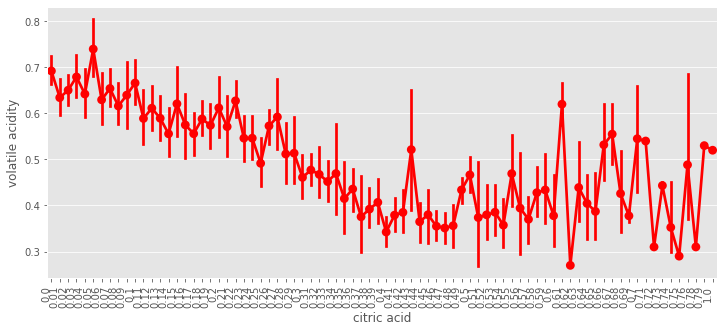

In [16]:
# 2. 구연산과 휘발성 산도의 관계를 확인해볼 필요가 있음
plt.figure(1, figsize=(12,5))
plt.xticks(rotation=90, ha="right")
sns.pointplot(x=df["citric acid"], y=df['volatile acidity'], color="r");

확인결과, 구연산이 많으면 휘발성 산도를 증가할 것으로 예측하였으나, 큰 상관관계는 없는 것으로 관측함이라고 썼으나 잘 생각해볼까요?  

산도가 증가한다는 것은 pH가 낮아지는 것이기 때문에 약0.4부터 조금씩 증가하는 것을 볼수 있습니다.  
🔥오! 특성을 하나 발견하였네요  

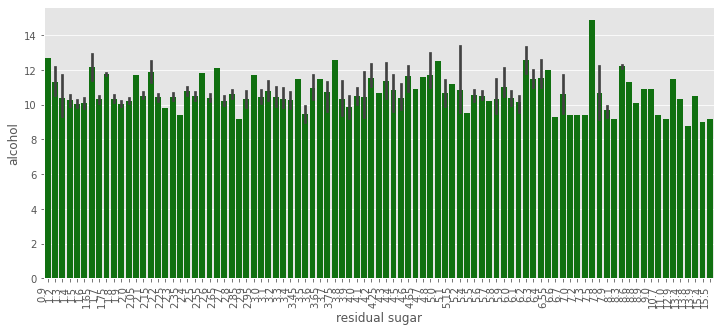

In [17]:
# 3. 잔류설탕은 시간이 지남에 따라 알코올로 변화될 것으로 관측이 됩니다. 
# 그렇다면 잔류설탕이 적을 때 알코올이 높은 역관계 그래프가 나오게 된다면 이 또한 상관관계가 있는 것으로 봐야겠지요
plt.figure(1, figsize=(12,5))
plt.xticks(rotation=90, ha="right")
sns.barplot(x=df['residual sugar'], y=df["alcohol"], color="g");

우리의 생각과 다르게 설탕과 알코올은 크게 상관관계가 없는 것으로 관측이 되네요

4. 염화물과 각 산도간의 상관관계를 확인해볼 필요가 있음

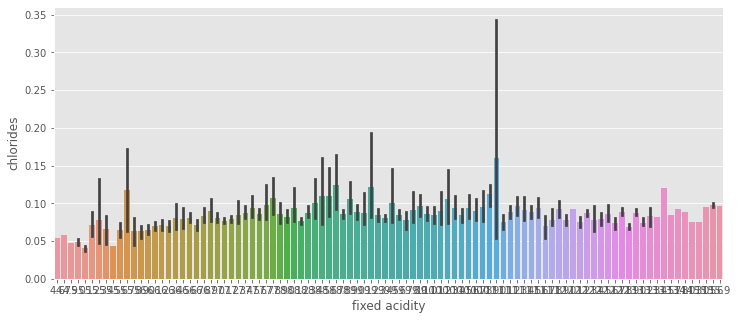

In [18]:
plt.figure(1, figsize=(12,5));
sns.barplot(x=df["fixed acidity"], y=df["chlorides"]);

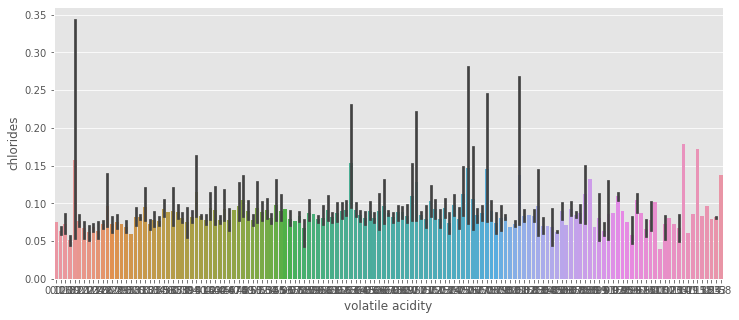

In [19]:
plt.figure(1, figsize=(12,5));
sns.barplot(x=df["volatile acidity"], y=df["chlorides"]);

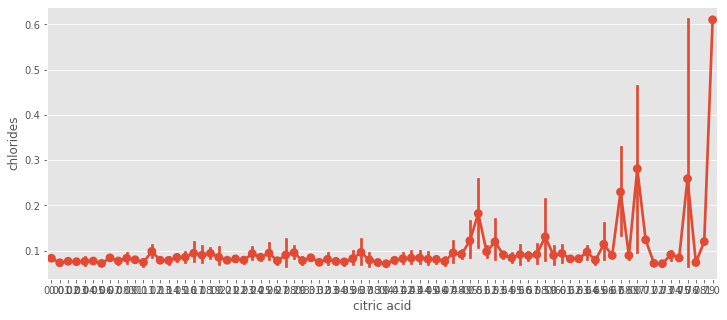

In [20]:
plt.figure(1, figsize=(12,5));
sns.pointplot(x=df["citric acid"], y=df["chlorides"]);

시각화 결과, 구연산만이 염화물과 조그마한 상관관계가 있으는 것으로 보이나 그닥 큰 상관관계가 있는 것으로 관측된 것은 아니다. 

## 2. Xgboost 를 사용해 학습하고 기존 모델과 비교해 보세요

2-1) 일반 파이프라인을 활용한 설능

In [21]:
from sklearn.model_selection import train_test_split

target = 'quality'
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df[target], random_state=2)

In [52]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)

X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(
    StandardScaler(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1, max_depth=15)
)

In [24]:
from sklearn.metrics import classification_report
# train 학습, 검증셋 정확도
pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, pipe.predict(X_val)))

검증 정확도 0.703125
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.80      0.79      0.79       109
           6       0.64      0.76      0.70       102
           7       0.60      0.47      0.53        32
           8       1.00      0.33      0.50         3

    accuracy                           0.70       256
   macro avg       0.51      0.39      0.42       256
weighted avg       0.68      0.70      0.69       256



2-2) Xgboost 파이프라인을 활용한 설능

In [25]:
#!pip3 install xgboost

In [26]:
# 많은 하이퍼파라미터를 사용하여 성능이 떨어지게 만들고자 한다. 
# 적절한 하이퍼파라미터가 중요하는 것을 인지하고 있음을 전달하고자 한다. 

from xgboost import XGBClassifier

pipe = make_pipeline( # 파라미터에 대한 설명은 아래 쪽에서 자세히 진행토록 하겠습니다. 
    XGBClassifier(n_estimators=100
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=15
                  , silent=False, 
                  booster='gbtree',
                  scale_pos_weight=1,
                  learning_rate=0.01,  
                  colsample_bytree = 0.4,
                  subsample = 0.8,
                  objective='binary:logistic', 
                  gamma=10, 
                  seed=777)
                 )


pipe.fit(X_train, y_train);

[01:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

검증 정확도:  0.6015625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.78      0.67      0.72       127
           6       0.68      0.53      0.60       129
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.60       256
   macro avg       0.24      0.20      0.22       256
weighted avg       0.73      0.60      0.66       256




🔥🔥🔥하이퍼파라미터를 막 사용하면 성능이 떨어질 수 있다는 사실을 테스트해보기 위해서 입니다.🔥🔥🔥

### ★ 내가 학습한 하이퍼파라미터들 ★  
  
eta [기본설정값: 0.3]: GBM에 학습율과 유사하고 일반적으로 0.01 ~ 0.2 값이 사용됨  
  
min_child_weight [기본설정값: 1]: 과적합(overfitting)을 방지할 목적으로 사용되는데, 너무 높은 값은 과소적합(underfitting)을 야기하기 때문에 CV를 사용해서 적절한 값이 제시되어야 한다.  
  
max_depth [기본설정값: 6]: 과적합 방지를 위해서 사용되는데 역시 CV를 사용해서 적절한 값이 제시되어야 하고 보통 3-10 사이 값이 적용된다.  
  
max_leaf_nodes: max_leaf_nodes 값이 설정되면 max_depth는 무시된다. 따라서 두값 중 하나를 사용한다.
  
max_delta_step [기본설정값: 0]: 일반적으로 잘 사용되지 않음.  
  
subsample [기본설정값: 1]: 개별 의사결정나무 모형에 사용되는 임의 표본수를 지정. 보통 0.5 ~ 1 사용됨.  
  
colsample_bytree [기본설정값: 1]: 개별 의사결정나무 모형에 사용될 변수갯수를 지정. 보통 0.5 ~ 1 사용됨.  
  
colsample_bylevel [기본설정값: 1]: subsample, colsample_bytree 두 초모수 설정을 통해서 이미 의사결정나무 모형 개발에 사용될 변수갯수와 관측점 갯수를 사용했는데 추가로 colsample_bylevel을 지정하는 것이 특별한 의미를 갖는지 의문이 듦.  
  
lambda [기본설정값: 1]: 능선 회쉬(Ridge Regression)의 L2 정규화(regularization) 초모수. 그다지 많이 사용되고 있지는 않음.  
  
alpha [기본설정값: 0]: 라쏘 회귀(Lasso Regression)의 L1 정규화(regularization) 초모수로 차원이 높은 경우 알고리즘 속도를 높일 수 있음.  
  
scale_pos_weight [기본설정값: 1]: 클래스 불균형이 심한 경우 0보다 큰 값을 지정하여 효과를 볼 수 있음.  

In [28]:
pipe = make_pipeline(
    StandardScaler(),
    SimpleImputer(), 
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=15)
                 )


pipe.fit(X_train, y_train);

[01:13:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

검증 정확도:  0.671875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.78      0.74      0.76       115
           6       0.71      0.64      0.67       112
           7       0.44      0.52      0.47        27
           8       0.33      0.50      0.40         2

    accuracy                           0.67       256
   macro avg       0.38      0.40      0.38       256
weighted avg       0.71      0.67      0.69       256



## 3. Permutation importances를 계산하고 다른 중요도 결과와 비교해 보세요

### 3-1) Permutation importances를 계산

In [30]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe, 
    scoring='accuracy', 
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=42
)


permuter.fit(X_val, y_val);

In [31]:
feature_names = X_val.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.1391 ± 0.0397,alcohol
0.0602 ± 0.0273,total sulfur dioxide
0.0445 ± 0.0235,sulphates
0.0422 ± 0.0322,volatile acidity
0.0258 ± 0.0219,pH
0.0023 ± 0.0235,density
0.0000 ± 0.0266,chlorides
-0.0063 ± 0.0117,residual sugar
-0.0078 ± 0.0131,free sulfur dioxide
-0.0203 ± 0.0206,citric acid


<AxesSubplot:>

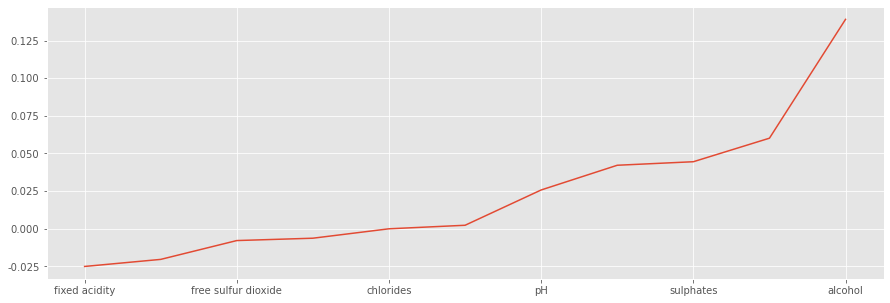

In [32]:
pd.Series(permuter.feature_importances_, feature_names).sort_values().plot(figsize=(15,5))

1. 위에서 예측한 대로 구연산(citric acid)은 타겟에 안좋은 영향을 주는 것으로 관측이 되었다.   
  -. 이유 : 구연산(citric acid)가 높으면 volatile acidity(휘발성 산)을 증가시키고 pH를 낮춰서 품질이 낮은 와인을 생산하는 것으로 추정된다. 

  
    
    
2. fixed acidity 또한 타겟에 안좋은 영향을 주는 것으로 관측되었다.   
  -. 이유 : fixed acidity이 많다는 것은 과발효가 발생된 경우이며, 화확적으로 와인 -> 식초로 변화되기 때문에 품질평가에서 저평가를 받는 것으로 추정된다.  
  


3. free sulfur dioxide, residual sugar 또한 안좋은 영향을 주는 것으로 관측이 되었으나, 와인을 공부하면서 해당 feature에는 큰 무리가 없는 것으로 자료조사가 되었기에 위 두개의 feature만 제외하고 다시 학습을 시켜보고자 한다. 

### 3-2) 안좋은 영향을 주는 feature제외 후 재학습

처음에는 "fixed acidity", "citric acid"만 제외 후 학습을 시켰더니 더 성능이 저하되어 음의 영향을 주는 모든 컬럼을 함께 제거 후 성능평가를 진행하였다. 이에, 0.01 성능이 향상되었다. 

In [33]:
df = df.drop(["fixed acidity", "citric acid", "free sulfur dioxide", "residual sugar"], axis=1)
df.head()

,volatile acidity,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,0.70,0.076,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
from sklearn.model_selection import train_test_split

target = 'quality'
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df[target], random_state=2)

In [35]:
X_test = test.drop(columns=target)
X_test, y_test = train_test_split(X_test, train_size=0.80, test_size=0.20, 
                               random_state=2)

In [36]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)

X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

In [37]:
pipe = make_pipeline(
    StandardScaler(),
    SimpleImputer(), 
    XGBClassifier(n_estimators=100
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=15)
                 )


pipe.fit(X_train, y_train);

[01:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [38]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

검증 정확도:  0.69140625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.81      0.77      0.79       114
           6       0.74      0.65      0.69       115
           7       0.41      0.52      0.46        25
           8       0.33      0.50      0.40         2

    accuracy                           0.69       256
   macro avg       0.38      0.41      0.39       256
weighted avg       0.73      0.69      0.71       256



## 4. (도전과제🔥) Xgboost 외에 다른 부스팅 라이브러리로 모델을 학습시켜 Xgboost와 비교해 보세요.

In [39]:
!pip install lightgbm

In [50]:
X_val

,volatile acidity,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
1444,0.670,0.072,92.0,0.99566,3.32,0.68,11.1
284,0.590,0.102,71.0,1.00015,3.31,0.71,9.8
108,0.330,0.091,80.0,0.99760,3.37,0.80,9.6
261,0.975,0.087,67.0,0.99565,3.35,0.60,9.4
103,0.575,0.077,65.0,0.99670,3.29,0.51,9.2
...,...,...,...,...,...,...,...
1586,0.310,0.065,60.0,0.99492,3.34,0.85,11.4
362,0.580,0.072,37.0,0.99920,3.05,0.56,10.0
512,0.400,0.125,49.0,0.99800,3.03,0.81,9.7
1559,0.600,0.080,131.0,0.99622,3.21,0.52,9.9


In [55]:
y_train = pd.DataFrame(y_train)
y_train

,quality
1412,6
1529,6
412,5
47,5
1156,7
...,...
1184,5
782,5
1004,5
1479,5


In [56]:
import lightgbm as lgb

params = {"learning_rate": 0.05, # 경사하강할때 얼마큼씩 내려갈 것이냐 
          "max_depth": 15, # 트리의 깊이
          "boosting": "gbdt", #부스팅 모델을 무엇을 쓸것인지 선택 
          # 부스팅 종류 
          # 1) gbdt : 전통적인 경사하강법 모델 
          # 2) rf : 랜덤포레스트 
          # 3) dart : Dropout meet multiple additive regression tree
          # 4) goss : Gradient based one side sampling 
          "objectiv": "regression", # 객체를 무엇으로 할것이냐 나는 회귀니까 regression pick
          "metric": "mse", # 오차는 어떻게 체크할 것인지 
          "featuer_fraction":0.8, # featuer_fraction이 1보다 작은 경우 매 tree 마다 다른 feature를 랜덤하게 추출하여 학습한다. 랜덤한 비율을 80%로 설정함 
          "baggin_fraction": 0.7, # 배깅하기 위해서 데이터를 랜덤 샘플링하여 학습에 사용함 
          "baggin_freq":5}
          
lgb.train(params, X_train, 100, y_train, early_stopping_rounds=100)

TypeError: Training only accepts Dataset object

# ★★★★★★★ 질문 ★★★★★★★

🔥🔥🔥🔥🔥🔥🔥🔥🔥Training only accepts Dataset object 이 오류를 만나서 열심히 구글링을 해보았지만 해결하지 못하였다🔥🔥🔥🔥🔥🔥🔥 참고해야할 키워드를 알려주시면 찾아보고 해결토록 하겠습니다. 


# Evaluation Metrics for Classification

### 1) Kaggle 챌린지를 이어서 진행합니다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
target = 'vacc_h1n1_f'
# target = 'vacc_seas_f'
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')
sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')

In [3]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)


train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

In [4]:
# 타켓 비율을 살펴보기 & 기준모델 설정
train[target].value_counts(normalize=True)

0    0.760935
1    0.239065
Name: vacc_h1n1_f, dtype: float64

In [5]:
train.select_dtypes('float').T

,20365,29138,36128,39793,32973,31450,17541,33946,5300,34292,...,15981,35280,14173,9193,34753,8747,4412,19064,40906,30904
h1n1_concern,1.0,1.0,2.0,2.0,0.0,0.0,3.0,2.0,2.0,3.0,...,3.0,2.0,2.0,3.0,0.0,NaN,3.0,NaN,NaN,2.0
h1n1_knowledge,1.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,...,0.0,1.0,1.0,1.0,2.0,NaN,2.0,NaN,NaN,1.0
behavioral_antiviral_meds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
behavioral_avoidance,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,NaN,1.0,NaN,NaN,0.0
behavioral_face_mask,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,0.0
behavioral_wash_hands,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0
behavioral_large_gatherings,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,0.0
behavioral_outside_home,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,1.0
behavioral_touch_face,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0
doctor_recc_h1n1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
train.T.duplicated()

h1n1_concern                   False
h1n1_knowledge                 False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_insurance               False
health_worker                  False
opinion_h1n1_vacc_effective    False
opinion_h1n1_risk              False
opinion_h1n1_sick_from_vacc    False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
agegrp                         False
education_comp                 False
raceeth4_i                     False
sex_i                          False
inc_pov                        False
marital                        False
r

타켓과 음의 상관관계를 갖는 컬럼을 제거해보았다. 

In [8]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

제거하기 전 검증 정확도 :  0.7526983750444787

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder

In [10]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42, n_jobs=-1, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)

검증 정확도 0.7642035345747835


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      6416
           1       0.91      0.01      0.03      2015

    accuracy                           0.76      8431
   macro avg       0.84      0.51      0.45      8431
weighted avg       0.80      0.76      0.67      8431



### 2) 본인이 개발한 모델에 대한 confusion matrix를 그려보세요. 
- (도전과제🔥) 각 평가지표에 대해 결과를 최대한 분석하고 무엇이 부족한지, 어떤 방향으로 성능을 높여야 하는지 논하세요.

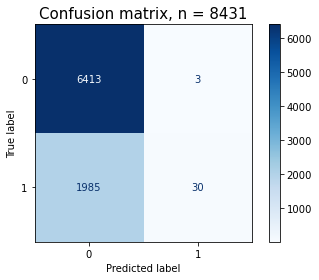

In [12]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [13]:
cm = pcm.confusion_matrix
cm

array([[6413,    3],
       [1985,   30]], dtype=int64)

In [14]:
correct_predictions = np.diag(cm).sum()
correct_predictions

6443

### 3) 랜덤포레스트의 n_estimator를 10, 100, 1000으로 바꾸어 가며 predict_proba를 비교해 보세요

In [15]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42, n_jobs=-1, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)

검증 정확도 0.7901791009370182


C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


In [16]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42, n_jobs=-1, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)

검증 정확도 0.7642035345747835


In [17]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=42, n_jobs=-1, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)

검증 정확도 0.7671687818764085


### 4) 두개 이상의 다른 분류 모델을 학습시켜 ROC curve, AUC 점수를 비교하고 설명합니다.

In [18]:
import seaborn as sns
threshold = 0.25

y_pred_proba = pipe.predict_proba(X_val)[:, 1]
y_pred = y_pred_proba > threshold
final_pred = y_pred.astype(int)


array([1, 0, 0, ..., 0, 0, 0])

False    5542
True     2889
dtype: int64

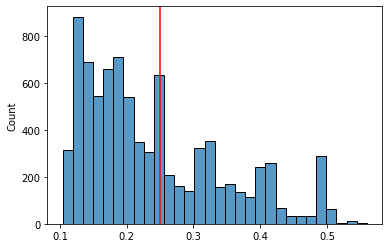

In [19]:
ax = sns.histplot(y_pred_proba)
ax.axvline(threshold, color='red')

pd.Series(y_pred).value_counts()

In [20]:
from ipywidgets import interact, fixed

def explore_threshold(y_true, y_pred_proba, threshold=0.5):
    y_pred = y_pred_proba >= threshold
    vc = pd.Series(y_pred).value_counts()
    ax = sns.histplot(y_pred_proba, kde=True)
    ax.axvline(threshold, color='red')
    ax.set_title(f'# of target, 1={vc[1]}, 0={vc[0]}')
    plt.show()
    print(classification_report(y_true, y_pred))

    
interact(explore_threshold, 
    y_true=fixed(y_val), 
    y_pred_proba=fixed(y_pred_proba), 
    threshold=(0, 1, 0.01));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [21]:
pred_proba = pd.DataFrame({
    'y_val': y_val,
    'pred_proba': y_pred_proba})
pred_proba

,y_val,pred_proba
18885,1,0.322125
8587,0,0.202842
17917,0,0.245332
27985,0,0.413695
917,0,0.155862
...,...,...
25383,1,0.410875
37833,0,0.216608
6921,0,0.163853
2706,0,0.167147


In [22]:
from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.559951
1,0.000000,0.000496,0.559951
2,0.000000,0.009926,0.510270
3,0.000000,0.010918,0.510230
4,0.000000,0.016377,0.508856
...,...,...,...
2344,0.993766,0.999007,0.109345
2345,0.993766,0.999504,0.109287
2346,0.995012,0.999504,0.108394
2347,0.995012,1.000000,0.108199


In [23]:
# threshold 최대값의 인덱스, np.argmax()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 1259 , threshold: 0.2504921442208222


In [24]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_val, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      6416
           1       0.49      0.71      0.58      2015

    accuracy                           0.76      8431
   macro avg       0.69      0.74      0.70      8431
weighted avg       0.80      0.76      0.77      8431



auc_score 계산

In [25]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.8156373566703589

### 5) Kaggle 챌린지에 결과를 submission 합니다.

In [40]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=10000, max_depth=15, random_state=42, n_jobs=-1, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)
y_pred

검증 정확도 0.8308622939153125


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

threshold = 0.25로 하였을 때 최적으로 검사되어 0.25로 test를 진행토록 하겠습니다. 

0.83으로 과적합이 아닐까 조심스럽게 우려해봅니다.  
그러나, 테스트해볼 수 있는데까지 테스트를 진행해보고자 합니다. 

In [47]:
threshold = 0.25

y_pred_proba = pipe.predict_proba(X_test)[:, 1]
y_pred = y_pred_proba > threshold
final_pred = y_pred.astype(int)

In [46]:
sample_submission
sample_submission["vacc_h1n1_f"] = final_pred
sample_submission.to_csv("submission.csv", index=False)

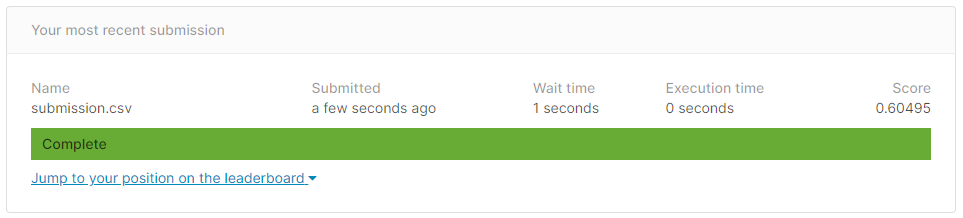